<a href="https://colab.research.google.com/github/LucasDatilioCarderelli/Maratona_BehindTheCode_IBM21/blob/main/desafio-2/MBTC2021_df2_Quanam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MBTC21_df2-Quanam

## Part 1 - Functions

https://us-south.functions.appdomain.cloud/api/v1/web/llucascarderelli%40gmail.com_dev/default/Quanam.json

In [ ]:
dict = {
  "room": "bathroom-main",
  "values": {
    "co2": 400,
    "temperature": 22,
    "humidity": 70,
    "sound": 30,
    "illumination": 150
  }
}

In [ ]:
import sys

def main(dict):
    alerts = []
    
    try:
        room = dict['room']
        values = dict['values']
    
        if room == 'activity-room':
            if values['co2'] >= 500:
                alerts.append('co2')
            if values['temperature'] <= 19 or values['temperature'] >= 22:
                alerts.append('temperature')
            if values['humidity'] <= 50 or values['humidity'] >= 60:
                alerts.append('humidity')
            if values['sound'] <= 0 or values['sound'] >= 40:
                alerts.append('sound')
            if values['illumination'] <= 300 or values['illumination'] >= 750:
                alerts.append('illumination')
        if room == 'refectory':
            if values['co2'] >= 400:
                alerts.append('co2')
            if values['temperature'] <= 20 or values['temperature'] >= 23:
                alerts.append('temperature')
            if values['humidity'] <= 50 or values['humidity'] >= 70:
                alerts.append('humidity')
            if values['sound'] <= 20 or values['sound'] >= 35:
                alerts.append('sound')
            if values['illumination'] <= 200 or values['illumination'] >= 500:
                alerts.append('illumination')
        if room == 'room-1':
            if values['co2'] >= 300:
                alerts.append('co2')
            if values['temperature'] <= 21 or values['temperature'] >= 23:
                alerts.append('temperature')
            if values['humidity'] <= 50 or values['humidity'] >= 60:
                alerts.append('humidity')
            if values['sound'] <= 10 or values['sound'] >= 30:
                alerts.append('sound')
            if values['illumination'] <= 100 or values['illumination'] >= 200:
                alerts.append('illumination')
        if room == 'bathroom-main':
            if values['co2'] >= 500:
                alerts.append('co2')
            if values['temperature'] <= 22 or values['temperature'] >= 25:
                alerts.append('temperature')
            if values['humidity'] <= 60 or values['humidity'] >= 75:
                alerts.append('humidity')
            if values['sound'] <= 20 or values['sound'] >= 35:
                alerts.append('sound')
            if values['illumination'] <= 100 or values['illumination'] >= 200:
                alerts.append('illumination')
        if room == 'garden':
            if values['co2'] >= 500:
                alerts.append('co2')
            if values['temperature'] <= 15 or values['temperature'] >= 22:
                alerts.append('temperature')
            if values['humidity'] <= 50 or values['humidity'] >= 80:
                alerts.append('humidity')
            if values['sound'] <= 10 or values['sound'] >= 35:
                alerts.append('sound')
    except: None
    
    message = {
        'alerts': alerts
    }

    return message
    

main(dict)

{'alerts': ['temperature']}

| Dado                        | Unidade de Medida | Ambiente                             | Alcance de valores aceitáveis    |
| --------------------------- | ----------------- | ------------------------------------ | -------------------------------- |
| CO2 (`co2`)                 | PPM               | Sala de Atividades (`activity-room`) | Até 500                          |
| "                           | "                 | Refeitório (`refectory`)             | Até 400                          |
| "                           | "                 | Quarto 1 (`room-1`)                  | Até 300                          |
| "                           | "                 | Banheiro Principal (`bathroom-main`) | Até 500                          |
| "                           | "                 | Jardim (`garden`)                    | Até 500                          |
| Temperatura (`temperature`) | °C                | Sala de Atividades (`activity-room`) | 19 - 22                          |
| "                           | "                 | Refeitório (`refectory`)             | 20 - 23                          |
| "                           | "                 | Quarto 1 (`room-1`)                  | 21 - 23                          |
| "                           | "                 | Banheiro Principal (`bathroom-main`) | 22 - 25                          |
| "                           | "                 | Jardim (`garden`)                    | 15 - 22                          |
| Humidade (`humidity`)       | %                 | Sala de Atividades (`activity-room`) | 50 - 60                          |
| "                           | "                 | Refeitório (`refectory`)             | 50 - 70                          |
| "                           | "                 | Quarto 1 (`room-1`)                  | 50 - 60                          |
| "                           | "                 | Banheiro Principal (`bathroom-main`) | 60 - 75                          |
| "                           | "                 | Jardim (`garden`)                    | 50 - 80                          |
| Som (`sound`)               | dB                | Sala de Atividades (`activity-room`) | 0 - 40                           |
| "                           | "                 | Refeitório (`refectory`)             | 20 - 35                          |
| "                           | "                 | Quarto 1 (`room-1`)                  | 10 - 30                          |
| "                           | "                 | Banheiro Principal (`bathroom-main`) | 20 - 35                          |
| "                           | "                 | Jardim (`garden`)                    | 10 - 35                          |
| Iluminação (`illumination`) | Lux               | Sala de Atividades (`activity-room`) | 300 - 750                        |
| "                           | "                 | Refeitório (`refectory`)             | 200 - 500                        |
| "                           | "                 | Quarto 1 (`room-1`)                  | 100 - 200                        |
| "                           | "                 | Banheiro Principal (`bathroom-main`) | 100 - 200                        |
| "                           | "                 | Jardim (`garden`)                    | N/A (Qualquer valor é aceitável) |

## Part 2 - ML

### Installs

In [ ]:
!pip install cloudant tpot AutoFeat

### Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cloudant import Cloudant
from tpot import TPOTRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

sns.set()

In [ ]:
u = '<user>'
p = '<senha>'
a = '<user>'

client = Cloudant(u,p, account=a, connect=True, auto_renev=True)

db = client['<nome_db>']

response = db.all_docs(include_docs=True)

docs=[]
for r in response["rows"]:
  docs.append(r["doc"])

df = pd.DataFrame(data=docs)
df.shape

(9976, 9)

In [ ]:
df = df.iloc[:,2:].drop_duplicates().sort_values("ID").set_index("ID")
df

,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
ID,,,,,,
1,467.9,65.59,486.1,41.06,23.27,92.39
2,387.14,70.23,501.81,25.93,18.77,85.17
3,339.75,74.72,535.88,30.5,19.41,80.76
4,390.19,63.83,422.76,24.18,17.41,63.55
5,454.11,70.64,619.85,16.5,20.31,83.19
...,...,...,...,...,...,...
3196,549.06,67.97,553.7,27.4,16.49,76.93
3197,408.51,63.25,516.07,28.51,20.22,84.96
3198,459.01,56.65,453.37,25.81,19.04,83.65


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3200 entries, 1 to 3200
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ILLUM   3200 non-null   object
 1   HUMID   3200 non-null   object
 2   CO2     3200 non-null   object
 3   SOUND   3200 non-null   object
 4   TEMP    3200 non-null   object
 5   RYTHM   3200 non-null   object
dtypes: object(6)
memory usage: 175.0+ KB


In [ ]:
df = df.astype(float)

### Analisys

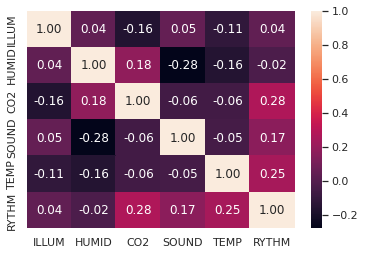

In [ ]:
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [ ]:
df.describe()

,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,439.163412,67.086106,501.620666,29.840194,20.042578,80.156616
std,89.915142,4.776214,42.951183,6.158710,1.648479,6.755854
min,145.480000,51.860000,352.820000,8.060000,14.760000,55.370000
25%,377.060000,63.770000,471.427500,25.550000,18.920000,75.657500
50%,437.375000,66.935000,502.350000,29.885000,20.050000,80.220000
75%,500.792500,70.330000,530.142500,33.932500,21.180000,84.660000
max,775.140000,83.900000,672.380000,53.780000,26.290000,108.900000


In [ ]:
df.RYTHM.value_counts()

82.43    7
76.21    7
77.45    7
78.44    6
81.94    6
        ..
73.99    1
89.53    1
79.41    1
92.94    1
76.93    1
Name: RYTHM, Length: 1828, dtype: int64

### Treatment

In [ ]:
df_group = df.groupby(by="RYTHM").mean()
df_group["RYTHM"] = df_group.index
df_group.index = range(0, 1828)
df_group

,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,266.22,70.48,545.82,16.66,17.04,55.37
1,468.44,67.44,444.02,23.17,18.51,57.51
2,348.18,69.72,505.15,27.06,19.97,59.22
3,517.15,74.85,438.27,22.63,20.52,59.29
4,474.24,68.51,511.63,27.99,20.75,60.49
...,...,...,...,...,...,...
1823,311.66,67.08,551.81,22.49,23.98,100.91
1824,354.43,62.55,560.09,43.86,22.66,100.94
1825,534.35,66.76,537.34,41.13,20.10,102.45
1826,568.72,67.74,569.78,31.73,19.50,105.92


In [ ]:
# df_group['mean'] = df_group[["ILLUM", "HUMID", "CO2", "SOUND", "TEMP"]].mean(axis=1)

In [ ]:
X = df_group[["ILLUM", "HUMID", "CO2", "SOUND", "TEMP"]]
y = df_group["RYTHM"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

predict = LinearRegression().fit(X_train, y_train).predict(X_test)
print(f'r2: {r2_score(y_test, np.round(predict, 2)):.4f} | mae: {mean_absolute_error(y_test, predict):.4f}')

r2: 0.3157 | mae: 5.0785


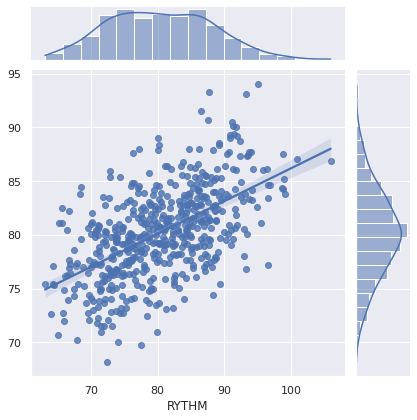

In [ ]:
sns.jointplot(x=y_test, y=predict, kind="reg");

In [ ]:
from sklearn.model_selection import cross_validate

scores = cross_validate(LinearRegression(), X, y, cv=10,
                        scoring='r2', return_train_score=True)
scores["train_score"].mean()

0.3083997369346116

In [ ]:
pipe = Pipeline(steps=[("scaler", MinMaxScaler())])
df_group = pipe.fit_transform(df_group)
df_group

array([[0.20662628, 0.62399464, 0.66439464, 0.18260145, 0.19270833,
        0.        ],
       [0.55269193, 0.52211796, 0.31395229, 0.3635353 , 0.34583333,
        0.03997758],
       [0.34688709, 0.59852547, 0.52438982, 0.47165092, 0.49791667,
        0.07192229],
       ...,
       [0.66548585, 0.49932976, 0.63520259, 0.8627015 , 0.51145833,
        0.87950682],
       [0.72430434, 0.53217158, 0.74687597, 0.60144525, 0.44895833,
        0.94433028],
       [0.57630831, 0.45676944, 0.47375125, 0.96192329, 0.478125  ,
        1.        ]])

In [ ]:
X = df[["ILLUM", "HUMID", "CO2", "SOUND", "TEMP"]]
y = df["RYTHM"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2880, 5), (320, 5), (2880,), (320,))

### Models

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(f'r2: {r2_score(y_test, predict):.4f} | mae: {mean_absolute_error(y_test, predict):.4f}')

r2: 0.2079 | mae: 4.8028


#### AutoFeat

In [ ]:
from autofeat import AutoFeatRegressor

X = df_group[:,:-1]
y = df_group[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=42)
model = AutoFeatRegressor()
df_feat = model.fit_transform(X, y)
pred = model.predict(X_test)
print("Final R^2: %.4f" % model.score(df_feat, y))

Final R^2: 0.3131


In [ ]:
df

,ILLUM,HUMID,CO2,SOUND,TEMP,1/(CO2*TEMP),CO2**3*ILLUM,SOUND**3*TEMP**3,ILLUM*TEMP**3,1/(CO2*SOUND),CO2**3*SOUND**3
0,266.22,70.48,545.82,16.66,17.04,0.000108,4.329014e+10,2.287883e+07,1.317193e+06,0.000110,7.519229e+11
1,468.44,67.44,444.02,23.17,18.51,0.000122,4.100734e+10,7.888553e+07,2.970799e+06,0.000097,1.088894e+12
2,348.18,69.72,505.15,27.06,19.97,0.000099,4.488124e+10,1.578038e+08,2.772924e+06,0.000073,2.554139e+12
3,517.15,74.85,438.27,22.63,20.52,0.000111,4.353532e+10,1.001350e+08,4.468365e+06,0.000101,9.756160e+11
4,474.24,68.51,511.63,27.99,20.75,0.000094,6.351352e+10,1.959129e+08,4.236942e+06,0.000070,2.936816e+12
...,...,...,...,...,...,...,...,...,...,...,...
1823,311.66,67.08,551.81,22.49,23.98,0.000076,5.236604e+10,1.568613e+08,4.297626e+06,0.000081,1.911336e+12
1824,354.43,62.55,560.09,43.86,22.66,0.000079,6.227359e+10,9.817154e+08,4.123920e+06,0.000041,1.482448e+13
1825,534.35,66.76,537.34,41.13,20.10,0.000093,8.290359e+10,5.650206e+08,4.339243e+06,0.000045,1.079502e+13
1826,568.72,67.74,569.78,31.73,19.50,0.000090,1.052011e+11,2.368722e+08,4.216988e+06,0.000055,5.909243e+12


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(f'r2: {r2_score(y_test, predict):.4f} | mae: {mean_absolute_error(y_test, predict):.4f}')

r2: 0.2344 | mae: 4.8016


#### Pipelines

In [ ]:
pipe = Pipeline(steps=[("scaler", MinMaxScaler()), 
                       ("liear_regression", LinearRegression())
                       ])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.2343703950250675

In [ ]:
pipe = Pipeline(steps=[("scaler", MinMaxScaler())])
pipe.fit(X)
X = pipe.transform(X)
X

array([[0.51205412, 0.42852684, 0.41707348, 0.72178478, 0.73807459],
       [0.38379443, 0.57334582, 0.46623482, 0.39085739, 0.34778838],
       [0.30853159, 0.71348315, 0.57285017, 0.49081365, 0.40329575],
       ...,
       [0.49793539, 0.14950062, 0.3146514 , 0.38823272, 0.37120555],
       [0.63539053, 0.52403246, 0.42220553, 0.40135608, 0.61665221],
       [0.36654703, 0.55305868, 0.42211165, 0.48818898, 0.35299219]])

In [ ]:
y = pipe.fit_transform(np.array(y).reshape(-1, 1))
y

array([[0.69157482],
       [0.55669718],
       [0.47431347],
       ...,
       [0.52830189],
       [0.5419391 ],
       [0.39342425]])

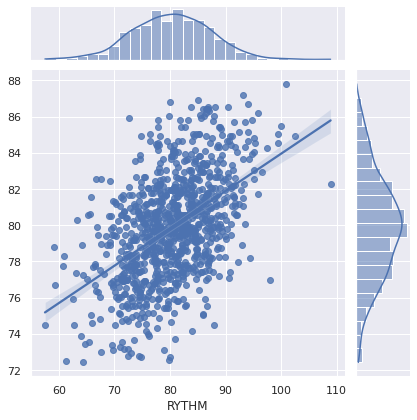

In [ ]:
sns.jointplot(x=y_test, y=predict, kind="reg");

#### Others

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(f'r2: {r2_score(y_test, predict):.4f} | mae: {mean_absolute_error(y_test, predict):.4f}')

r2: -0.5624 | mae: 7.4058


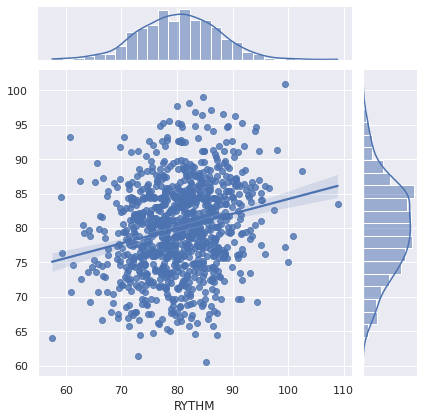

In [ ]:
sns.jointplot(x=y_test, y=predict, kind="reg");

In [ ]:
from sklearn.linear_model import RidgeCV

model = RidgeCV()
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(r2_score(y_test, predict))

0.31294317665043603


#### TPOT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, y, train_size=.7, random_state=42)
tpot = TPOTRegressor(generations=10, population_size=100, verbosity=2, 
                     scoring="r2", random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_pipeline.py')

Optimization Progress:   0%|          | 0/1100 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.292279884094944

Generation 2 - Current best internal CV score: 0.2938919994405861

Generation 3 - Current best internal CV score: 0.2938919994405861

Generation 4 - Current best internal CV score: 0.2938919994405861

Generation 5 - Current best internal CV score: 0.2938919994405861

Generation 6 - Current best internal CV score: 0.2944163785524348

Generation 7 - Current best internal CV score: 0.29448671892818035

Generation 8 - Current best internal CV score: 0.29448671892818035

Generation 9 - Current best internal CV score: 0.29472461568512415

Generation 10 - Current best internal CV score: 0.29472461568512415

Best pipeline: LassoLarsCV(SGDRegressor(ElasticNetCV(MinMaxScaler(input_matrix), l1_ratio=0.05, tol=1e-05), alpha=0.001, eta0=0.01, fit_intercept=False, l1_ratio=0.0, learning_rate=constant, loss=epsilon_insensitive, penalty=elasticnet, power_t=1.0), normalize=False)
0.31686515423191075


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'str_']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
from sklearn.pipeline           import make_pipeline, make_union
from sklearn.preprocessing      import RobustScaler, StandardScaler
from sklearn.feature_selection  import SelectPercentile, f_regression
from sklearn.linear_model       import (ElasticNetCV, LassoLarsCV, 
                                        RidgeCV, SGDRegressor)
from sklearn.ensemble           import GradientBoostingRegressor
from tpot.builtins              import OneHotEncoder, StackingEstimator

In [ ]:
# Average CV score on the training set was: 0.29472461568512415
exported_pipeline = make_pipeline(
    MinMaxScaler(),
    StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.05, tol=1e-05)),
    StackingEstimator(estimator=SGDRegressor(alpha=0.001, eta0=0.01, fit_intercept=False, l1_ratio=0.0, learning_rate="constant", loss="epsilon_insensitive", penalty="elasticnet", power_t=1.0)),
    LassoLarsCV(normalize=False)
)
exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
print(f'r2: {r2_score(y_test, results):.4f} | mae: {mean_absolute_error(y_test, results):.4f}')

r2: 0.3178 | mae: 5.0640


In [ ]:
scores = cross_validate(exported_pipeline, X, y, cv=10,
                        scoring='r2', return_train_score=True)
scores["train_score"].mean()

0.3081900133018009

In [ ]:
# Average CV score on the training set was: 0.29440305111758236
exported_pipeline = make_pipeline(
    # SelectPercentile(score_func=f_regression, percentile=84),
    RidgeCV()
)
exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
print(f'r2: {r2_score(y_test, results):.4f} | mae: {mean_absolute_error(y_test, results):.4f}')

r2: 0.3157 | mae: 5.0792


In [ ]:
# Average CV score on the training set was: 0.17915259203950792
exported_pipeline = make_pipeline(
    StandardScaler(),
    StackingEstimator(estimator=SGDRegressor(alpha=0.0, eta0=0.1, fit_intercept=True, l1_ratio=0.5, learning_rate="invscaling", loss="huber", penalty="elasticnet", power_t=0.0)),
    RobustScaler(),
    StackingEstimator(estimator=RidgeCV()),
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.99, learning_rate=1.0, loss="ls", max_depth=8, max_features=0.15000000000000002, min_samples_leaf=12, min_samples_split=5, n_estimators=100, subsample=0.05)),
    StackingEstimator(estimator=LassoLarsCV(normalize=True)),
    OneHotEncoder(minimum_fraction=0.1, sparse=False, threshold=10),
    ElasticNetCV(l1_ratio=0.6000000000000001, tol=0.001)
)
exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)
print(f'r2: {r2_score(y_test, results):.4f} | mae: {mean_absolute_error(y_test, results):.4f}')

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


r2: 0.2082 | mae: 4.8008


#### XGBoost

In [ ]:
from xgboost import XGBRegressor

XGB = XGBRegressor(random_state=42)
XGB.fit(X_train, y_train)
pred = XGB.predict(X_test)
print(f'r2: {r2_score(y_test, predict):.4f} | mae: {mean_absolute_error(y_test, predict):.4f}')

r2: -0.5624 | mae: 7.4058


## Part 3 - Submiting

In [ ]:
answers = pd.read_csv("https://raw.githubusercontent.com/maratonadev/desafio-2-2021/main/assets/answers.csv")
answers.drop(["ID", "RYTHM"], axis=1, inplace=True)

df = df.groupby(by="RYTHM").mean()
df["RYTHM"] = df.index
df.index = range(0, 1828)

X = df[["ILLUM", "HUMID", "CO2", "SOUND", "TEMP"]]
y = df["RYTHM"]

rythm = LinearRegression().fit(X, y).predict(answers)

answers["RYTHM"] = rythm
answers["ID"] = range(0,800)
answers = answers[["ID", "ILLUM", "HUMID", "CO2", "SOUND", "TEMP", "RYTHM"]]

answers.to_csv("answers.csv", index=False)
answers

,ID,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
0,0,337.90,63.29,518.13,22.38,18.59,74.923863
1,1,342.96,63.19,488.85,37.36,20.41,81.068060
2,2,369.86,57.39,516.86,26.45,20.89,80.844541
3,3,304.65,67.80,517.50,32.98,22.52,85.283496
4,4,442.25,68.21,500.91,37.28,21.88,85.974594
...,...,...,...,...,...,...,...
795,795,421.39,55.97,451.86,29.25,18.96,73.703550
796,796,572.90,59.42,502.12,36.12,19.70,83.307673
797,797,460.78,64.28,560.54,31.20,15.11,76.405958
798,798,499.75,67.20,536.88,30.68,17.57,79.383572
